# QKeras RNN comparison


1. Create a model and compare its performance to the boosted model
2. If the model outreach the performance of the boosted model : 
 -   create a model with the same feature with qkeras (QAT) and 
 -   quantized the keras model (PTQ)
3. Compare those two to PTQ boosted model

The models with keras should converge to around 1e-5 or 9.8e-6

For QKeras it's been somewhere around 1.1e-5 or so



# To Run Everytime

## Imports

In [1]:
import tensorflow as tf
import keras
import numpy as np
import time
import random
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Flatten, LSTM, GRU, SimpleRNN, Conv2D, MaxPooling2D, Flatten, Dropout, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.regularizers import l2, l1, l1_l2
from collections import deque

from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras
from matplotlib import pyplot as plt
from IPython.display import clear_output

import qkeras
from qkeras import *

import hls4ml
import pickle


2022-07-22 13:26:43.029037: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-22 13:26:43.029055: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/atlas/bonnet/miniconda3/envs/hls4ml-tutorial/lib/python3.7/site-packages/hls4ml-0.5.1-py3.7.egg/hls4ml/converters/__init__.py:15: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!")


In [2]:
# Load libraries if they are changed
%load_ext autoreload
%autoreload 2


## Data creation 

In [1]:
from nnlar.datashaper import DataShaper
ds = DataShaper.from_h5("/atlas/bonnet/Desktop/code/internship_CPPM/data/rdgap_mu140.h5")

x, x_val, x_test, y, y_val, y_test = ds()

shapes (1999995, 5, 1) (1999995, 1)
shapes (899992, 5, 1) (99995, 5, 1) (999998, 5, 1)


In [4]:
boosted_model =  tf.keras.models.load_model('/atlas/bonnet/Desktop/code/internship_CPPM/pb_file')

boosted_model.summary()


2022-07-22 13:26:51.619744: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-22 13:26:51.619770: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-22 13:26:51.619783: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (marsattack3): /proc/driver/nvidia/version does not exist
2022-07-22 13:26:51.619937: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 80        
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


## Settings

In [5]:
# settings of the networks 
output = 1

nbr_batch = 64
nbr_epoch = 200
lr=0.001

nbr_conv_epoch = 4 #number of epochs for the conversion 

patience_es = 8
patience_rlr = 5
delta7 = 0.0000001
delta8 = 0.00000001
delta9 = 0.000000001
delta10 = 0.0000000001

delta=delta8
def version(v): return (v)
versions_range = 4

def units(j): return (j+8)
units_range = 1

j=0



In [6]:
# path


#path of the tested models 
def models_path7(j,v) : return f"tests/models/models_units={units(j)}_mindelta={delta7}v{version(v)}.h5"

#path of the tested models 
def predicts_path7(j,v) : return f"tests/predicts/models_units={units(j)}_mindelta={delta7}v{version(v)}.npy"



#path of the tested models 
def models_path8(j,v) : return f"tests/models/models_units={units(j)}_mindelta={delta8}v{version(v)}.h5"

#path of the tested models 
def predicts_path8(j,v) : return f"tests/predicts/models_units={units(j)}_mindelta={delta8}v{version(v)}.npy"



#path of the tested models 
def models_path9(j,v) : return f"tests/models/models_units={units(j)}_mindelta={delta9}v{version(v)}.h5"

#path of the tested models 
def predicts_path9(j,v) : return f"tests/predicts/models_units={units(j)}_mindelta={delta9}v{version(v)}.npy"


#path of the tested models 
def models_path10(j,v) : return f"tests/models/models_units={units(j)}_mindelta={delta10}v{version(v)}.h5"

#path of the tested models 
def predicts_path10(j,v) : return f"tests/predicts/models_units={units(j)}_mindelta={delta10}v{version(v)}.npy"


# 3. Compare the results

In [7]:
def exist(path,modeltopred):
    if (os.path.exists(path)==False):
        np.save(path, modeltopred.predict(x_test))
     
    else : print(f'{path} already exists')


## Predictions

In [8]:

ref = 'tests/ref_predicts.npy'
exist(ref, boosted_model)


for v in range (versions_range):
        
    exist(predicts_path7(j,v),tf.keras.models.load_model(models_path7(j,v)))
    exist(predicts_path8(j,v),tf.keras.models.load_model(models_path8(j,v)))
    exist(predicts_path9(j,v),tf.keras.models.load_model(models_path9(j,v)))
    exist(predicts_path10(j,v),tf.keras.models.load_model(models_path10(j,v)))





tests/ref_predicts.npy already exists
tests/predicts/models_units=8_mindelta=1e-07v0.npy already exists
tests/predicts/models_units=8_mindelta=1e-08v0.npy already exists
tests/predicts/models_units=8_mindelta=1e-09v0.npy already exists
tests/predicts/models_units=8_mindelta=1e-10v0.npy already exists
tests/predicts/models_units=8_mindelta=1e-07v1.npy already exists
tests/predicts/models_units=8_mindelta=1e-08v1.npy already exists
tests/predicts/models_units=8_mindelta=1e-09v1.npy already exists
tests/predicts/models_units=8_mindelta=1e-10v1.npy already exists
tests/predicts/models_units=8_mindelta=1e-07v2.npy already exists
tests/predicts/models_units=8_mindelta=1e-08v2.npy already exists
tests/predicts/models_units=8_mindelta=1e-09v2.npy already exists
tests/predicts/models_units=8_mindelta=1e-10v2.npy already exists
tests/predicts/models_units=8_mindelta=1e-07v3.npy already exists
tests/predicts/models_units=8_mindelta=1e-08v3.npy already exists
tests/predicts/models_units=8_mindelta

## Plotting

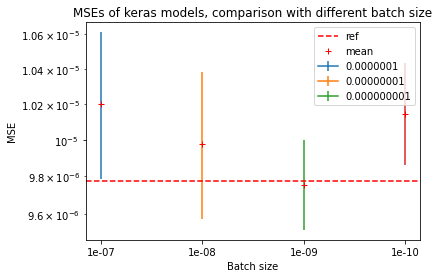

In [10]:
x=[]
bits=[]
mean=[]

error=[]
loss=[]
x.append(0)
bits.append(0.0000001)
best_mse=100
worst_mse=00
tmp_loss=[]
sum = 0
for v in range (versions_range):
    y_keras0 = np.load(predicts_path7(j,v))
    tmp_mse = mse(y_test,y_keras0)
    sum = sum+tmp_mse

    tmp_loss.append(tmp_mse)
    if (best_mse>tmp_mse): best_mse=tmp_mse
    if (worst_mse<tmp_mse): worst_mse=tmp_mse      
loss.append(sum/versions_range)
mean.append(sum/versions_range)
error.append(np.std(tmp_loss))
plt.errorbar(x=x,y=loss, yerr=error)

x=[]
error=[]
loss=[]
x.append(1)
bits.append(0.00000001)
best_mse=100
worst_mse=00
tmp_loss=[]
sum = 0
for v in range (versions_range):
    y_keras0 = np.load(predicts_path8(j,v))
    tmp_mse = mse(y_test,y_keras0)
    sum = sum+tmp_mse

    tmp_loss.append(tmp_mse)
    if (best_mse>tmp_mse): best_mse=tmp_mse
    if (worst_mse<tmp_mse): worst_mse=tmp_mse      
loss.append(sum/versions_range)
mean.append(sum/versions_range)
error.append(np.std(tmp_loss))
plt.errorbar(x=x,y=loss, yerr=error)

x=[]
error=[]
loss=[]
x.append(2)
bits.append(0.000000001)
best_mse=100
worst_mse=00
tmp_loss=[]
sum = 0
for v in range (versions_range):
    y_keras0 = np.load(predicts_path9(j,v))
    tmp_mse = mse(y_test,y_keras0)
    sum = sum+tmp_mse

    tmp_loss.append(tmp_mse)
    if (best_mse>tmp_mse): best_mse=tmp_mse
    if (worst_mse<tmp_mse): worst_mse=tmp_mse      
loss.append(sum/versions_range)
mean.append(sum/versions_range)
error.append(np.std(tmp_loss))
plt.errorbar(x=x,y=loss, yerr=error)

x=[]
error=[]
loss=[]
x.append(3)
bits.append(0.0000000001)
best_mse=100
worst_mse=00
tmp_loss=[]
sum = 0
for v in range (versions_range):
    y_keras0 = np.load(predicts_path10(j,v))
    tmp_mse = mse(y_test,y_keras0)
    sum = sum+tmp_mse

    tmp_loss.append(tmp_mse)
    if (best_mse>tmp_mse): best_mse=tmp_mse
    if (worst_mse<tmp_mse): worst_mse=tmp_mse      
loss.append(sum/versions_range)
mean.append(sum/versions_range)
error.append(np.std(tmp_loss))
plt.errorbar(x=x,y=loss, yerr=error)

plt.axhline(mse(y_test, np.load(ref)), linestyle="--", color = 'red')
plt.plot(mean, 'r+')
plt.legend(['ref','mean','0.0000001','0.00000001','0.000000001'])
plt.title(f'MSEs of keras models, comparison with different batch size')
plt.ylabel("MSE")
plt.xlabel("Batch size")   
plt.xticks(np.arange(len(bits)), [f"{Bit}" for Bit in bits])
plt.yscale('log')
plt.show()


In [ ]:
for k in range(rest_units_range):
    loss1 = [] 
    loss2 = [] 
    loss3 = [] 
    yaxis = []
    sum1=0
    sum2=0
    sum3=0
    sum4=0
    sum5=0
    sum6=0
    sum0=0

    yaxis.append('<2,0>')
    yaxis.append('<4,0>')
    yaxis.append('<6,0>')
    yaxis.append('<8,0>')
    yaxis.append('<10,0>')
    yaxis.append('<12,0>')
    yaxis.append('<14,0>')
    for v in range (2):

        loss1 = [] 
        y_kerasref = np.load(predicts_path(0))
        y_keras0 = np.load(qpredicts_path0(0,v,k))
        y_keras1 = np.load(qpredicts_path0(1,v,k))
        y_keras2 = np.load(qpredicts_path0(2,v,k))
        y_keras3 = np.load(qpredicts_path0(3,v,k))
        y_keras4 = np.load(qpredicts_path0(4,v,k))
        y_keras5 = np.load(qpredicts_path0(5,v,k))
        y_keras6 = np.load(qpredicts_path0(6,v,k))
        y_keras0 = np.load(qpredicts_path0(0,v,k))
        y_keras1 = np.load(qpredicts_path0(1,v,k))
        y_keras2 = np.load(qpredicts_path0(2,v,k))
        y_keras3 = np.load(qpredicts_path0(3,v,k))
        y_keras4 = np.load(qpredicts_path0(4,v,k))
        y_keras5 = np.load(qpredicts_path0(5,v,k))
        y_keras6 = np.load(qpredicts_path0(6,v,k))

    
        sum0= sum0+mse(y_test,y_keras0)
        sum1= sum1+mse(y_test,y_keras1)
        sum2= sum2+mse(y_test,y_keras2)
        sum3= sum3+mse(y_test,y_keras3)
        sum4= sum4+mse(y_test,y_keras4)
        sum5= sum5+mse(y_test,y_keras5)
        sum6= sum6+mse(y_test,y_keras6)

        
        loss1.append(mse(y_test,y_keras0))   
        loss1.append(mse(y_test,y_keras1))
        loss1.append(mse(y_test,y_keras2))        
        loss1.append(mse(y_test,y_keras3))     
        loss1.append(mse(y_test,y_keras4))     
        loss1.append(mse(y_test,y_keras5))  
        loss1.append(mse(y_test,y_keras6)) 
        #
        #plt.plot(loss1,'+')
        print(loss1)

    loss2.append((sum0/versions_range))
    loss2.append((sum1/versions_range))
    loss2.append((sum2/versions_range))
    loss2.append((sum3/versions_range))
    loss2.append((sum4/versions_range))
    loss2.append((sum5/versions_range))
    loss2.append((sum6/versions_range))
    

    plt.yscale('log')
    plt.plot(loss2)
    #plt.legend(['bench 1','bench 2','bench 3','mean'])
plt.xticks(np.arange(len(yaxis)), [f"{Bit}" for Bit in yaxis])
plt.title(f'MSEs of qkeras models, initialized with pre-trained weights\n Comparison with different recurrent kernel quantization (x axis)')
plt.ylabel("MSE")
plt.xlabel("Bit width")

plt.axhline(mse(y_test, np.load(ref)), linestyle="--", color = 'red')
plt.legend(['rest set to <8,0>','rest set to <10,0>','rest set to <12,0>','ref'])


NameError: name 'rest_units_range' is not defined

In [ ]:
def loss(i):
    loss=[] 
    return loss

loss0 = []
loss0b = []
loss9 = []
loss9b = []
loss1 = [] 
loss1b = [] 
loss2 = []
loss3 = []

bit_nbr = []


    sum1=0
for v in range (versions_range):
    for i in range(units_range):
        for k in range (rest_units_range):
                y_qkeras0 = np.load(qpredicts_path0(i,v,k))
                sum1= sum1 + mse(y_test,y_qkeras0)
                loss0.append(mse(y_test,y_qkeras0))  
    loss1.append(sum1/versions_range)

plt.figure()
plt.plot(loss0)
plt.plot(loss1,"X")
plt.axhline(mse(y_test, np.load(predicts_path(0))), linestyle="--", color = 'red')
plt.legend(['rest set to <8,0>, no weight decay','rest set to <9,0>, no weight decay','rest set to <10,0>, no weight decay', 'ref no decay']) #
plt.xticks(np.arange(len(bit_nbr)), [f"<{Bit},{integer}>" for Bit in bit_nbr])
plt.xlabel('bits settings')
#plt.yscale('log')
plt.ylabel('MSE')
plt.title(f'MSE qkeras, comparison with differente bitwidth for the rkernel, integer={integer}')
plt.show()

IndentationError: unexpected indent (2999469.py, line 17)

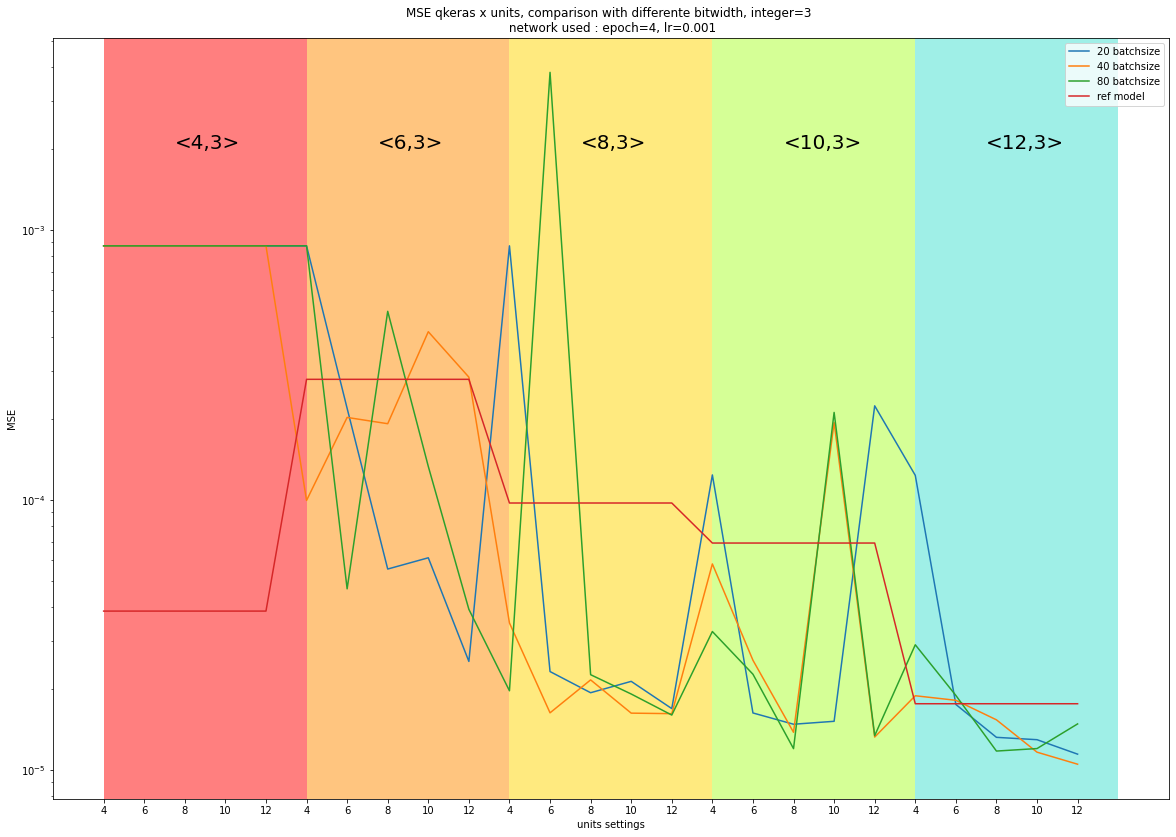

In [ ]:
    plt.figure(figsize=(20,14))
    plt.plot(loss1)
    plt.plot(loss2)
    plt.plot(loss3)
    plt.plot(loss4)
    plt.legend(['20 batchsize','40 batchsize','80 batchsize','ref model'])
    plt.xticks(np.arange(len(unit_nbr)), [f"{unit}" for unit in unit_nbr])
    
    plt.axvspan(0, 5, facecolor='red', alpha=0.5)
    plt.text(1.75, 0.002, "<4,3>", fontsize = 20 )
    plt.text(6.75, 0.002, "<6,3>", fontsize = 20 )
    plt.text(11.75, 0.002, "<8,3>", fontsize = 20 )
    plt.text(16.75, 0.002, "<10,3>", fontsize = 20 )
    plt.text(21.75, 0.002, "<12,3>", fontsize = 20 )
   
    
    plt.axvspan(5, 10, facecolor='darkorange', alpha=0.5)
    plt.axvspan(10, 15, facecolor='gold', alpha=0.5)
    plt.axvspan(15, 20, facecolor='greenyellow', alpha=0.5)    
    plt.axvspan(20, 25, facecolor='turquoise', alpha=0.5)
 
  
    plt.xlabel('units settings')
    plt.yscale('log')
    plt.ylabel('MSE')
    plt.title(f'MSE qkeras x units, comparison with differente bitwidth, integer={integer} \n network used : epoch={nbr_conv_epoch}, lr={lr}')
    plt.show()

31250/31250 [==============================] - 43s 1ms/step


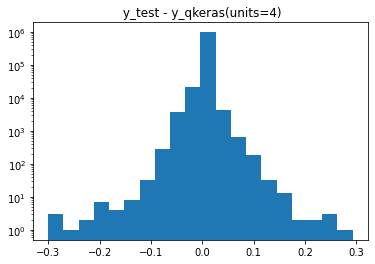

31250/31250 [==============================] - 44s 1ms/step


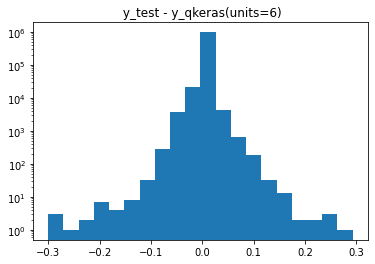

31250/31250 [==============================] - 42s 1ms/step


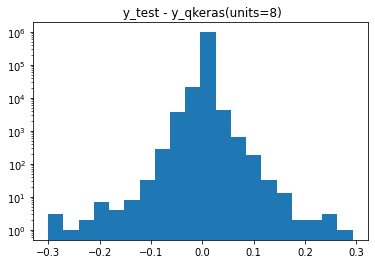

31250/31250 [==============================] - 42s 1ms/step


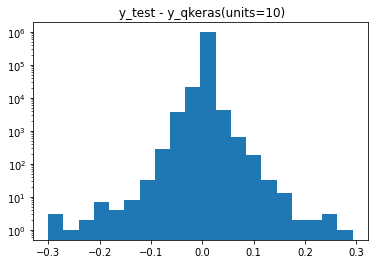

31250/31250 [==============================] - 43s 1ms/step


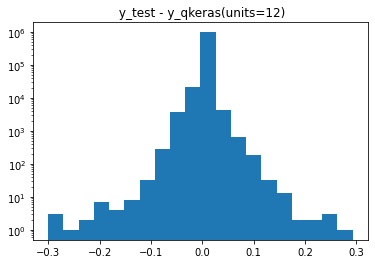

31250/31250 [==============================] - 44s 1ms/step


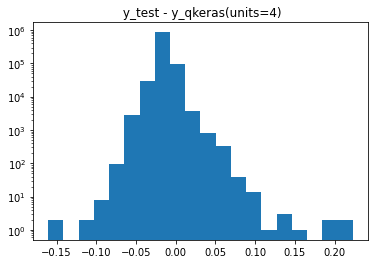

31250/31250 [==============================] - 43s 1ms/step


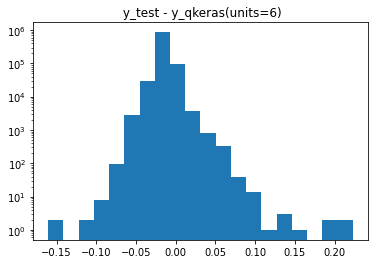

31250/31250 [==============================] - 45s 1ms/step


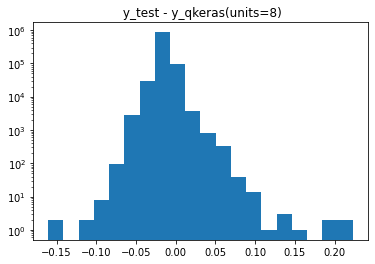

31250/31250 [==============================] - 44s 1ms/step


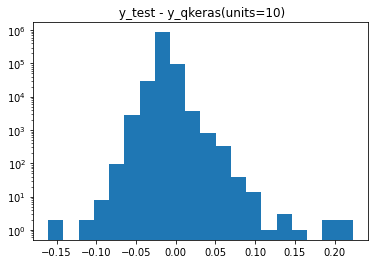

31250/31250 [==============================] - 43s 1ms/step


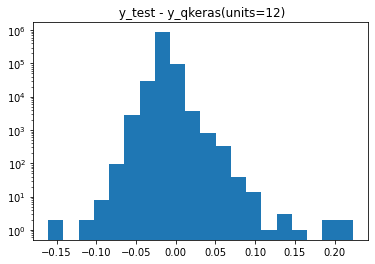

31250/31250 [==============================] - 47s 1ms/step


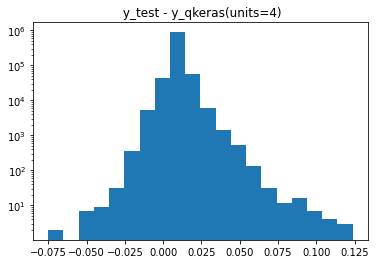

31250/31250 [==============================] - 48s 2ms/step


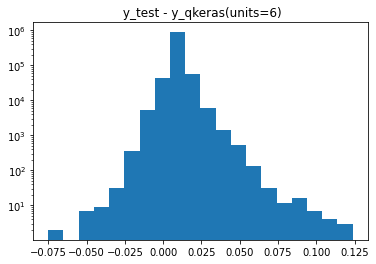

31250/31250 [==============================] - 48s 2ms/step


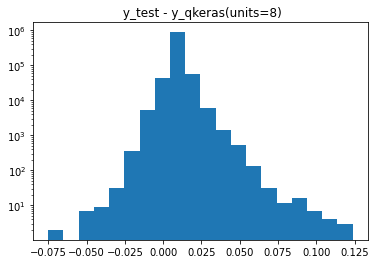

31250/31250 [==============================] - 45s 1ms/step


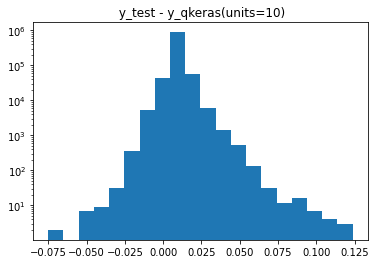

31250/31250 [==============================] - 49s 2ms/step


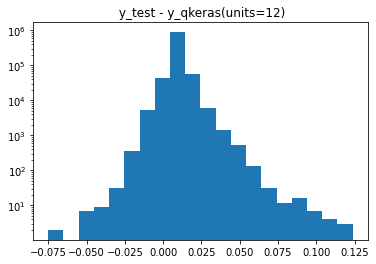

31250/31250 [==============================] - 43s 1ms/step


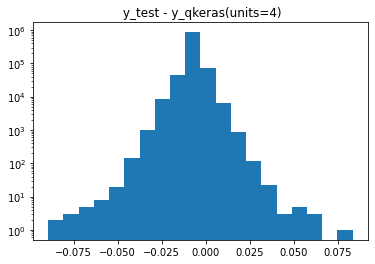

31250/31250 [==============================] - 42s 1ms/step


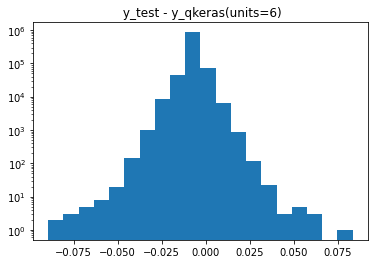

31250/31250 [==============================] - 42s 1ms/step


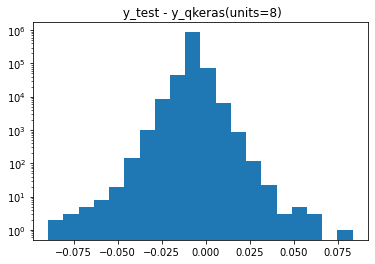

31250/31250 [==============================] - 46s 1ms/step


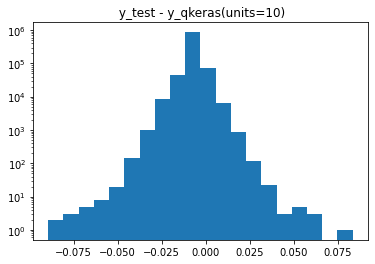

31250/31250 [==============================] - 44s 1ms/step


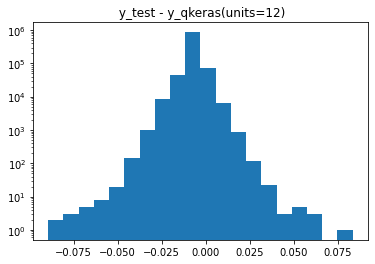

31250/31250 [==============================] - 44s 1ms/step


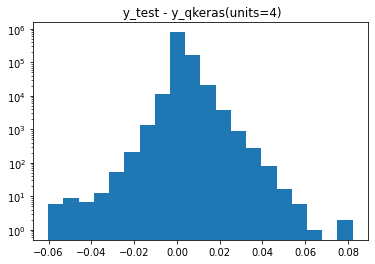

31250/31250 [==============================] - 45s 1ms/step


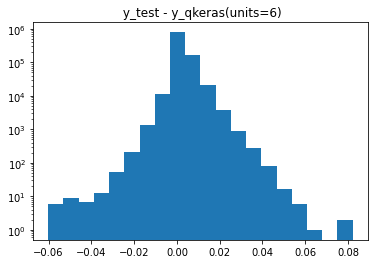

31250/31250 [==============================] - 46s 1ms/step


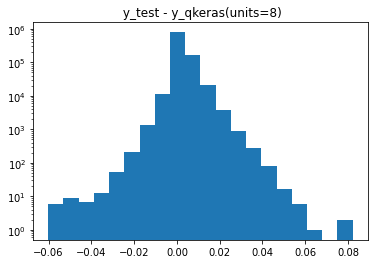

31250/31250 [==============================] - 49s 2ms/step


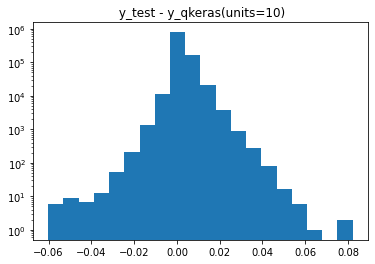

31250/31250 [==============================] - 48s 2ms/step


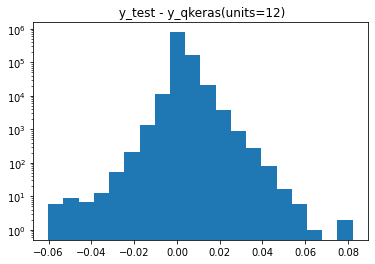

In [ ]:
bit_nbr = []
loss3 = []
loss4 = []
unit_nbr = []

for i in range(bits_range):
        qmodel4 = qkeras.utils.load_qmodel(f'qmodels_epoch=4/qmodels_units,<{bit_lenghts(i)},3>.h5')        
        y_qkeras4 = qmodel4.predict(x_test)
        for j in range(units_range):
                qmodel3 = qkeras.utils.load_qmodel(qmodels_path3(j,i))        
                y_qkeras3 = qmodel3.predict(x_test)                        

                loss3.append(mse(y_test,y_qkeras3))
                loss4.append(mse(y_test,y_qkeras4))

                plt.figure()
                plt.hist(y_test-y_qkeras4, bins=20)
                plt.yscale('log')
                plt.title(f' y_test - y_qkeras(units={units(j)})')
                plt.show()